In [18]:
import tensorflow as tf

In [19]:
tf.__version__

'2.15.0'

In [20]:
mnist = tf.keras.datasets.mnist #28*28 dataset of 0-9 handwritten numbers

In [21]:
#Unpacking the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

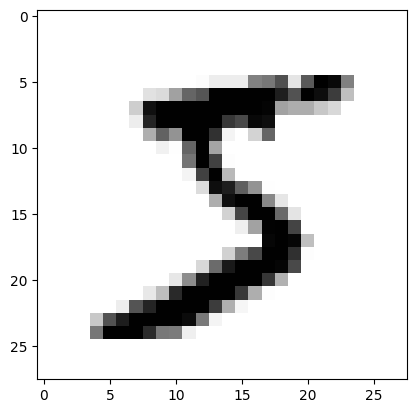

In [22]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [ ]:
#Normalizing Data -> Such that the value of tensor is between 0 and 1(axis) WHY? -> So that the range of data in our dataset is between 0 to 1 and it is benificial in model training

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

print(x_train[0])

In [30]:
#Model Architecture
model = tf.keras.models.Sequential() #Type of a Model -> Sequential - For basic, feed forward type of models

#Adding Layers

#Input Layer(Flattened)
#Flattening - Flattening is a process that converts the Multi-dimensional tensor into One Dimensional vector. Makes it easier
model.add(tf.keras.layers.Flatten())

#Adding 2 Hidden Layers
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) #128 is the number of neurons in each layer
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))#relu activation function is sort of the default for basic DeepLearning Tasks

#Adding the final(output)layer
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) #neurons = 10, here the number of neurons is 10 as we have 10 potential classifications -> 0-9
#Softmax is often used as the activation for the last layer of a classification network because the result could be interpreted as a probability distribution.


#Deep Learning Model doesnt try to maximize accuracy, it tries to MINIMIZE loss

#Loss Function has also several types such as you would use binary_categorical_crossentropy for binary classification(Cat or Dog)
model.compile(optimizer ='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics= 'accuracy')


#Training the model
model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2655 - accuracy: 0.9221
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1075 - accuracy: 0.9666
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0724 - accuracy: 0.9770


In [31]:
#Checking for Overfitting(Trained too well on dataset that memorizes the dataset's patterns and hence performs bad on testing)
#validation loss, validation accuracy

val_loss, val_accuracy = model.evaluate(x_test, y_test)
print(val_loss, val_accuracy)

313/313 [==============================] - 2s 4ms/step - loss: 0.1033 - accuracy: 0.9676
0.10328786820173264 0.9675999879837036


In [32]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model.save("Handwritten Number Predictor")

In [35]:
n_model = tf.keras.models.load_model("Handwritten Number Predictor")

In [37]:
predictions = n_model.predict(x_test) #models.predict will only have predictions inside a tensor

313/313 [==============================] - 1s 2ms/step


7


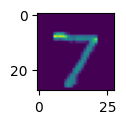

2


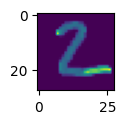

1


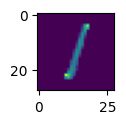

0


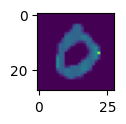

4


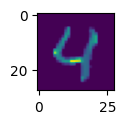

1


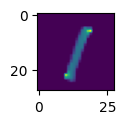

4


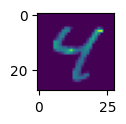

9


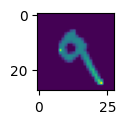

5


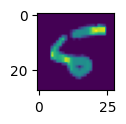

9


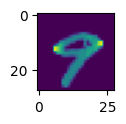

In [50]:
#Prediction for first 10 values in the dataset
import numpy as np
for i in range(10):
    print(np.argmax(predictions[i]))
    plt.figure(figsize=(10, 1))
    plt.imshow(x_test[i])
    plt.show()

In [52]:
predictions.shape

(10000, 10)

7


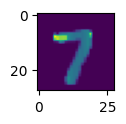

8


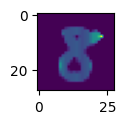

9


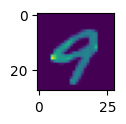

0


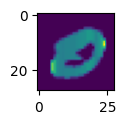

1


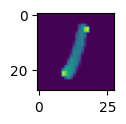

2


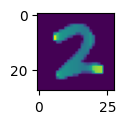

3


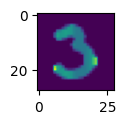

4


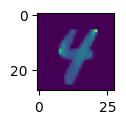

5


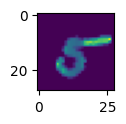

6


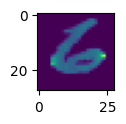

In [54]:
#predictions for last 10 values of the dataset
for i in range(9990,10000):
    print(np.argmax(predictions[i]))
    plt.figure(figsize=(10, 1))
    plt.imshow(x_test[i])
    plt.show()